In [1]:
from PIL import Image
import numpy as np

In [2]:
from copy import copy

In [3]:
import matplotlib.pyplot as plt

In [22]:
img = Image.open("cao.png")
bimg = Image.open("ballon.png")
avatar_img = Image.open("avatar_mxy.png")
nickname_img = Image.open("nickname_mxy.png")

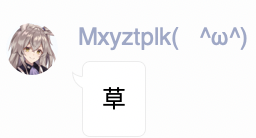

In [27]:
img

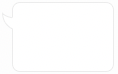

In [28]:
bimg

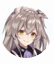

In [29]:
avatar_img

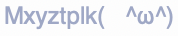

In [30]:
nickname_img

In [23]:
def tao(img):

    '''
    Resize the ballon
    '''
    bary=np.array(bimg)
    increase_width = img.size[0] - 85
    increase_height = img.size[1] - 50
    res = copy(bary)
    ballon_row = res[40:41,:]
    for i in range(increase_height):
        res = np.insert(res, 41, ballon_row,axis=0)
    ballon_column = res[:,20:21]
    for i in range(increase_width):
        res = np.column_stack([res[:,:21],ballon_column,res[:,21:]])
    '''
    Paste original pic into ballon
    There is (a,b) + (c,d) = (a, b, c, d)
    '''
    resimg = Image.fromarray(res)
    init_width = 20
    init_height = 12
    init_position = (init_width,init_height)
    end_position = (init_width + img.size[0], init_height + img.size[1])
    box = init_position + end_position # Concatenate
    resimg.paste(img, box)
    
    final_img = Image.new(mode = 'RGBA',
              size=((resimg.size[0] if resimg.size[0] > nickname_img.size[0] else nickname_img.size[0]) + int(avatar_img.size[0]), 
               resimg.size[1] + nickname_img.size[1]),
                     color=(255,255,255))
    final_img.paste(avatar_img,(0,0,avatar_img.size[0],avatar_img.size[1]))
    final_img.paste(resimg,(avatar_img.size[0],
                            int(avatar_img.size[1]/2),
                            resimg.size[0] + avatar_img.size[0], 
                            resimg.size[1] + int(avatar_img.size[1]/2)))
    final_img.paste(nickname_img,(avatar_img.size[0],
                                 0,
                                 nickname_img.size[0] + avatar_img.size[0],
                                 nickname_img.size[1]))
    return final_img

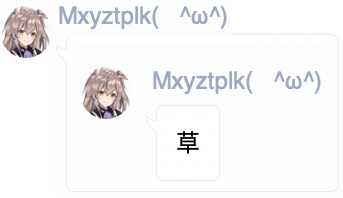

In [24]:
tao(img)

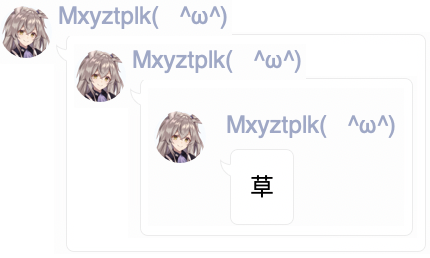

In [25]:
tao(tao(img))

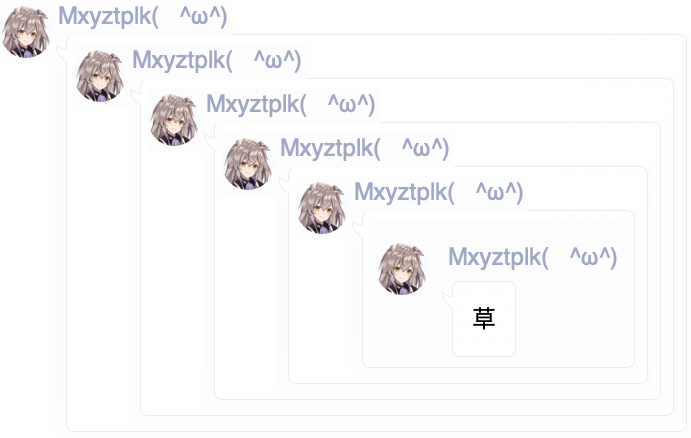

In [26]:
tao(tao(tao(tao(tao(img)))))